# Linear Regression model on FuelConsumption Data set


# Change The Directory

In [1]:
import os
os.chdir("C:\\datasciencepractice")

# Import Basic Library and Data set

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
data=pd.read_csv("FuelConsumption.csv")
print(data.head(10))

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   
5       2014  ACURA         RLX     MID-SIZE         3.5          6   
6       2014  ACURA          TL     MID-SIZE         3.5          6   
7       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
8       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
9       2014  ACURA         TSX      COMPACT         2.4          4   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2       

# Data preprocessing

In [16]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [17]:
data.index

RangeIndex(start=0, stop=1067, step=1)

In [18]:
data.memory_usage()

Index                         80
MODELYEAR                   8536
MAKE                        8536
MODEL                       8536
VEHICLECLASS                8536
ENGINESIZE                  8536
CYLINDERS                   8536
TRANSMISSION                8536
FUELTYPE                    8536
FUELCONSUMPTION_CITY        8536
FUELCONSUMPTION_HWY         8536
FUELCONSUMPTION_COMB        8536
FUELCONSUMPTION_COMB_MPG    8536
CO2EMISSIONS                8536
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [20]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [21]:
data.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

# Lets get some Feature for Exploration

In [23]:
cdf=data[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


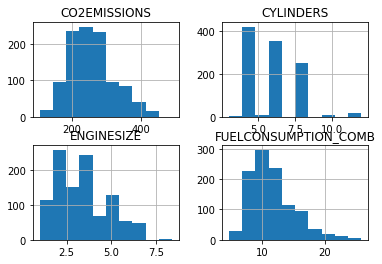

In [27]:
cdf.hist(bins=10)
plt.show()

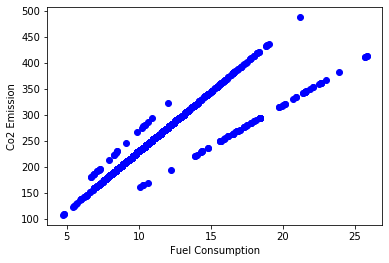

In [28]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"],cdf["CO2EMISSIONS"],color="blue")
plt.xlabel("Fuel Consumption")
plt.ylabel("Co2 Emission")
plt.show()

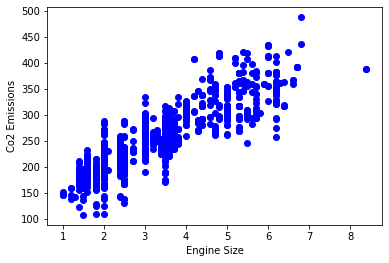

In [29]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

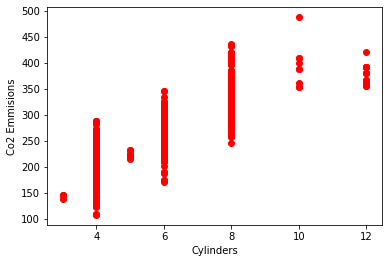

In [30]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='red')
plt.xlabel("Cylinders")
plt.ylabel("Co2 Emmisions")
plt.show()

# Split Data set train and test

In [33]:
msk=np.random.rand(len(data))<0.8
train=cdf[msk]
test=cdf[~msk]

# Train Data Distribution

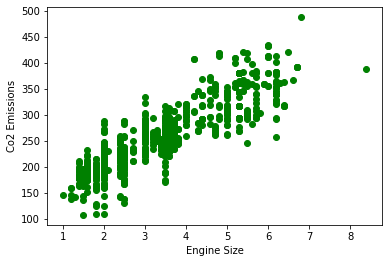

In [35]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='green')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

# Modeling

In [36]:
from sklearn import linear_model
regx=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

regx.fit(train_x,train_y)
print("Coefficients::",regx.coef_)
print("Intercept::",regx.intercept_)

Coefficients:: [[39.71946539]]
Intercept:: [123.19347167]


# Plot the output

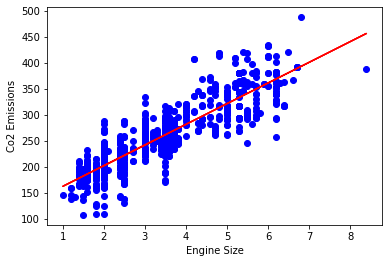

In [39]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,regx.coef_[0][0]*train_x+regx.intercept_[0],'-r')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

# Evalution

In [42]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])
test_y_hat=regx.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.65
Residual sum of squares (MSE): 865.49
R2-score: 0.72
